In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def openFiles(fileName):
    with open(fileName) as file:
        data = np.fromfile(file, sep= " ", dtype=float)
    phi, energy, error= data.reshape(-1,3).T
    return phi, energy


def genData(fileNames:dict[str,str]):
    for fileName in fileNames.keys():
        data = openFiles(fileName)
        label = fileNames[fileName]
        yield data, label

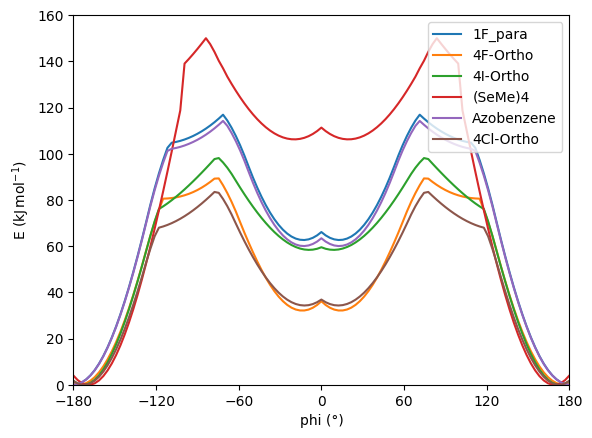

In [10]:
fileNames= {
    "energys_1FPara.xvg": "1F_para",
    "energys_4FOrtho.xvg" : "4F-Ortho",
    "energys_4IOrtho.xvg": "4I-Ortho",
    "energys_(SeMe)4.xvg" : "(SeMe)4",
    "energys_Azobenzene.xvg" : "Azobenzene",
    "energys_4ClOrtho.xvg" : "4Cl-Ortho",
}

fig, ax = plt.subplots()
ax.set_xlim(-180, 180)
ax.set_ylim(0, 160)
ax.set_xticks([x for x in range(-180, 181, 60)])
for data, label in genData(fileNames):
    ax.plot(data[0], data[1], label = label)
ax.legend(loc =1 )
ax.set_xlabel(r"phi (°)")
ax.set_ylabel(r"E ($\text{kJ}\,\text{mol}^{-1}$)")
fig.savefig("energys.png")

|  Structure |       Energy (kJ/mol)     |
|:----------:|:-----------------:|
| 1F_para      |     54.24958 |
| 4F-Ortho     |     57.17530 |
| 4I-Ortho     |     39.74020 |
| (SeMe)4      |     43.78843 |
| Azobenzene   |     54.16580 |


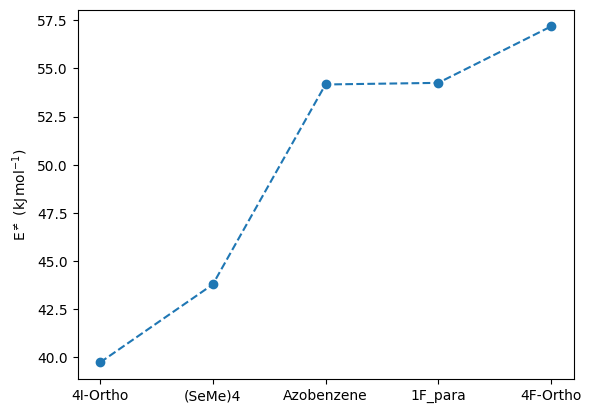

In [5]:
fileNames= {
    "energys_1FPara.xvg": "1F_para",
    "energys_4FOrtho.xvg" : "4F-Ortho",
    "energys_4IOrtho.xvg": "4I-Ortho",
    "energys_(SeMe)4.xvg" : "(SeMe)4",
    "energys_Azobenzene.xvg" : "Azobenzene",
}
tsEnergys = []


print("|  Structure |       Energy (kJ/mol)     |\n\
|:----------:|:-----------------:|")
for data, label in genData(fileNames):
    phi, energy = data[0], data[1]
    tsEnergys.append([label, energy.max()-energy[35:70].min()])
    print(f"| {label:12} |", f"{energy.max()-energy[35:70].min():12.5f} |")



def sortSecond(val):
    return val[1] 
tsEnergys.sort(key=sortSecond)
labels, energys = np.array(tsEnergys).T
energys = np.array(energys, dtype=float)

fig, ax = plt.subplots()
ax.scatter(labels, energys)
ax.plot(labels, energys, ls="--")
ax.set_ylabel(r"E$^{\neq}$ ($\text{kJ}\,\text{mol}^{-1}$)")
fig.savefig("tsEnergys.png")

|  Structure |       Energy (kJ/mol)     |
|:----------:|:-----------------:|
| 4F-Ortho     |     57.17530 |
| 1F_para      |     54.24958 |
| Azobenzene   |     54.16580 |
| (SeMe)4      |     43.78843 |
| 4I-Ortho     |     39.74020 |

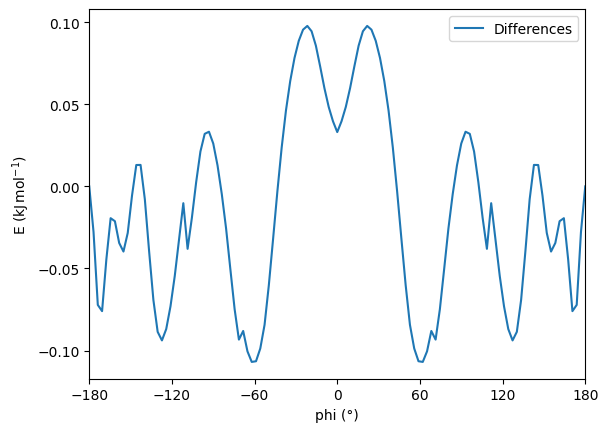

In [6]:
phi1, energy1 = openFiles("energys_AzobenzOld.xvg")
phi2, energy2 = openFiles("energys_Azobenzene.xvg")

fig, ax = plt.subplots()
ax.set_xlim(-180, 180)
#ax.set_ylim(0, 160)
ax.set_xticks([x for x in range(-180, 181, 60)])
ax.plot(phi1, (energy1-energy2), label = "Differences")
ax.legend();
ax.set_xlabel(r"phi (°)")
ax.set_ylabel(r"E ($\text{kJ}\,\text{mol}^{-1}$)")
fig.savefig("differences.png")

In [7]:
arr = np.array([])
with open("COLVAR", "r") as file:
    file.readline(), file.readline(), file.readline()
    for _ in range(int(2e5)):
        file.readline(), file.readline()
        arr =np.append(arr, list(map(float,file.readline()[:-1].split()[:3])))

FileNotFoundError: [Errno 2] No such file or directory: 'COLVAR'

Text(0, 0.5, 'angle')

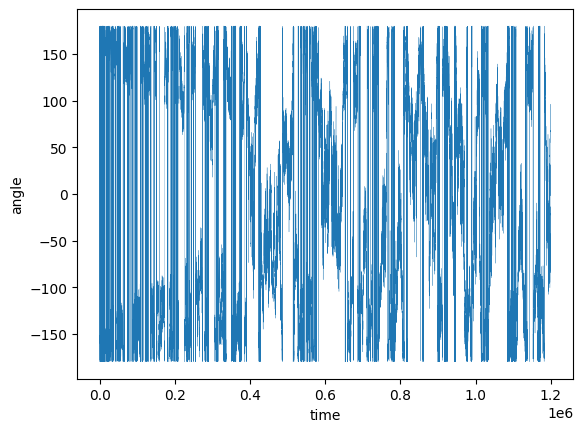

In [ ]:
time, dihed, alphabeta  = arr.reshape(-1,3).T

dihed = dihed* (180/np.pi)
fig, ax = plt.subplots()
ax.plot(time, dihed, lw="0.2")
ax.set_xlabel(r"time")
ax.set_ylabel(r"angle")